In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
rcParams['figure.figsize'] = 9, 5

In [2]:
dataset = pd.read_csv('toyota_cleaned_dataset_v2.csv')
dataset.head(2)

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,GT86,2016,Manual,24089,Petrol,265,36.2,2.0,16000
1,GT86,2017,Manual,18615,Petrol,145,36.2,2.0,15995


In [5]:
# up to 6 values are 0 
# to solve this issue substitute with mean
dataset['engineSize'][dataset.engineSize == 0] = dataset.engineSize.median()

In [6]:
dataset = pd.get_dummies(dataset, drop_first=True)
dataset.head(3)

,year,mileage,tax,mpg,engineSize,price,model_Avensis,model_Aygo,model_C-HR,model_Camry,...,model_Hilux,model_PROACE VERSO,model_Prius,model_RAV4,model_Verso,model_Yaris,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2016,24089,265,36.2,2.0,16000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2017,18615,145,36.2,2.0,15995,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2015,27469,265,36.2,2.0,13998,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [7]:
X, y = dataset.drop('price',axis=1), dataset['price']

# splitting data to 20/80 for testing and traning
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [18]:
print(X_train.shape, X_test.shape)

(4672, 21) (1169, 21)


In [9]:
X_test.shape

(1169, 21)

<h3><center>1. Build a linear model</center></h3>

In [10]:
# linear model
lm = LinearRegression()

# linear regression model cross validation
val_score = cross_val_score(lm, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
val_sc = round(val_score.mean(),4)

lm.fit(X_train, y_train)
y_pred_test = lm.predict(X_test)
r_2 = round(metrics.r2_score(y_test,y_pred_test),4)
mean_sq = round(mean_squared_error(y_test,y_pred_test),2 )
print(f'The average validation score is: {val_sc}\t AND R^2 = {r_2}')
print(f'Mean Squared Error: {mean_sq}') 

The average validation score is: 0.9487	 AND R^2 = 0.9452
Mean Squared Error: 1264586.81


<h3><center>2. Lasso Regression</center></h3>

In [11]:
# lasso model
lm_laso = Lasso(alpha=0.7)

# lasso regression model cross validation
val_score = cross_val_score(lm_laso, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
val_sc = round(val_score.mean(),4)

lm_laso.fit(X_train, y_train)
y_pred_test = lm_laso.predict(X_test)
r_2 = round(metrics.r2_score(y_test,y_pred_test),4)
mean_sq = round(mean_squared_error(y_test,y_pred_test),2 )
print(f'The average validation score is: {val_sc}\t AND R^2 = {r_2}')
print(f'Mean Squared Error: {mean_sq}') 

The average validation score is: 0.9486	 AND R^2 = 0.9454
Mean Squared Error: 1260993.2


<h3><center>3. Ridge regression</center></h3>

In [12]:
# Ridge model
lm_reg = Ridge(alpha=1)

# Ridge regression model cross validation
val_score = cross_val_score(lm_reg, X_train, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
val_sc = round(val_score.mean(),4)

lm_reg.fit(X_train, y_train)
y_pred_test = lm_reg.predict(X_test)
r_2 = round(metrics.r2_score(y_test,y_pred_test),4)
mean_sq = round(mean_squared_error(y_test,y_pred_test),2 )
print(f'The average validation score is: {val_sc}\t AND R^2 = {r_2}')
print(f'Mean Squared Error: {mean_sq}') 

The average validation score is: 0.9483	 AND R^2 = 0.9454
Mean Squared Error: 1260829.35


In [13]:
# Feature scaling for train, val, and test so that we can run our ridge model on each
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.values)
X_test_scaled = scaler.transform(X_test.values)


# Ridge model
lm_reg = Ridge(alpha=1)

# Ridge regression model cross validation
val_score = cross_val_score(lm_reg, X_train_scaled, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
val_sc = round(val_score.mean(),4)

lm_reg.fit(X_train_scaled, y_train)
y_pred_test = lm_reg.predict(X_test_scaled)
r_2 = round(metrics.r2_score(y_test,y_pred_test),4)
mean_sq = round(mean_squared_error(y_test,y_pred_test),2 )

print(f'The average validation score is: {val_sc}\t AND R^2 = {r_2}')
print(f'Mean Squared Error: {mean_sq}') 



The average validation score is: 0.9487	 AND R^2 = 0.9452
Mean Squared Error: 1264357.72


<h3><center>4. polynomial regression</center></h3>

In [14]:
# polynomial model
# Feature transforms for train test so that we can run our poly model on each
poly = PolynomialFeatures(degree=2) 

X_train_poly = poly.fit_transform(X_train.values)
X_test_poly = poly.transform(X_test.values)

lm_poly = LinearRegression()


# Ridge regression model cross validation
val_score = cross_val_score(lm_poly, X_train_scaled, y_train, # estimator, features, target
                cv=5, # number of folds 
                scoring='r2') # scoring metric
val_sc = round(val_score.mean(),4)

lm_poly.fit(X_train_scaled, y_train)
y_pred_test = lm_poly.predict(X_test_scaled)
r_2 = round(metrics.r2_score(y_test,y_pred_test),4)
mean_sq = round(mean_squared_error(y_test,y_pred_test),2 )
print(f'The average validation score of Polynomial regression with degree 2 is: {val_sc}\t AND R^2 = {r_2}')
print(f'Mean Squared Error: {mean_sq}')

The average validation score of Polynomial regression with degree 2 is: 0.9487	 AND R^2 = 0.9452
Mean Squared Error: 1264586.81


<h3><center>5. Model Selection</center></h3>

In [15]:
# mean sq error
# lasso Error: min => 1260993.2 
print("Selected Model: Lasso Regression")
print('Model coefficients: %s'%(lm_laso.coef_))
print('Model intercept: ',round(lm_laso.intercept_),4)


Selected Model: Lasso Regression
Model coefficients: [ 7.99151974e+02 -5.20032320e-02 -3.48953929e+00 -2.69901292e+01
  2.86263477e+03  3.18919738e+02 -2.51605732e+03  5.21558343e+03
  1.58117349e+03  4.69229517e+03  4.81102119e+03  6.36237794e+03
  8.50522130e+03  5.07727276e+03  3.51444407e+03  7.18838980e+02
 -1.64006402e+03 -1.39089813e+03 -2.37771014e+02  2.40951966e+03
  5.59965688e+02]
Model intercept:  -1600765.0 4


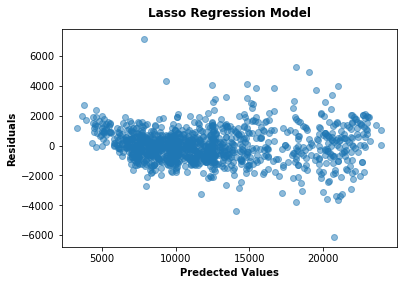

In [16]:
# Residual plot
error_rs = pd.DataFrame({'Error': (y_test - y_pred_test)})
ax = plt.scatter(y_pred_test,error_rs['Error'],alpha=0.5)
plt.title('Lasso Regression Model', fontsize=12, fontweight='bold',y=1.03)
plt.ylabel('Residuals',fontweight='bold')
plt.xlabel('Predected Values',fontweight='bold');
# plt.savefig('Lasso Regression Model.png', dpi=430);